# INTRODUCTION

Our project explores the personal histories of American astronauts to see if factors related to their date of birth and subsequent astrological sign may serve as predictors of propensity to go into space. We explore whether being born under a particular astrological sign or on a specific day of the week is more common among astronauts compared to the general population. We used data on the personal details of all American astronauts since the founding of NASA, the national distribution of birthdays, and a table of zodiac signs.

# DATA SOURCES  
We worked with three datasets, all related by dates:

1. **Astronaut biographical and occupational data** (astronauts.csv): This table contains biographical data about all NASA astronauts. Of particular interest to our analysis will be the astronauts' birthdates. The immediate issues we noticed were the birth date and the column names. https://www.kaggle.com/nasa/astronaut-yearbook  
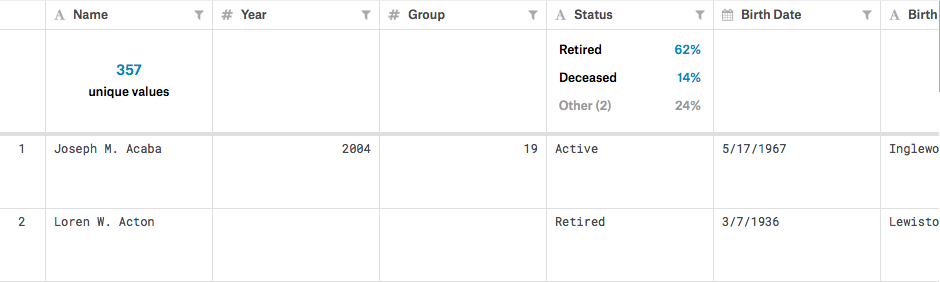  
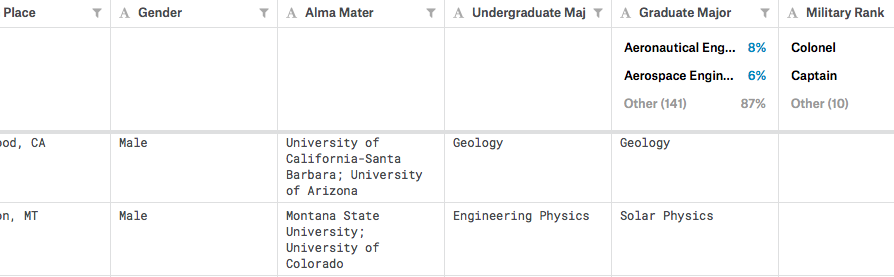
3. **National distribution of birthdays** (birth_rates.csv): This pair of tables contains U.S. birthrate information by date, 1994-2003 from the CDC & NCHS and 2000-2014 from the SSA. We used the CDC table for 2000-2003. We noticed the text headers within the document that would need to be excluded during the import into MySQL. https://github.com/fivethirtyeight/data/tree/master/births  
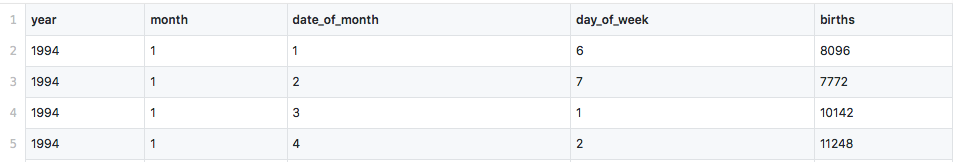  
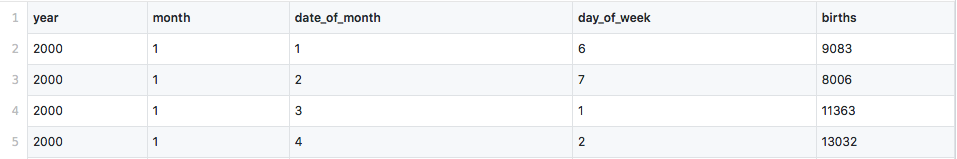
4. **Astrological signs** (zodiacs.csv): This table includes the date ranges for the Tropical Zodiac, used in the U.S. We looked for other table options since this came to us as HTML, but could not locate a clearer option. Importing to Excel and saving as a CSV did not yeild usable results, perhaps due to the inclusion of images. We chose instead to write the CSV from scratch to practice writing CSVs from dicts. With this data set, we also identified the date formatting as an issue to address during MySQL import. https://en.wikipedia.org/wiki/Zodiac   
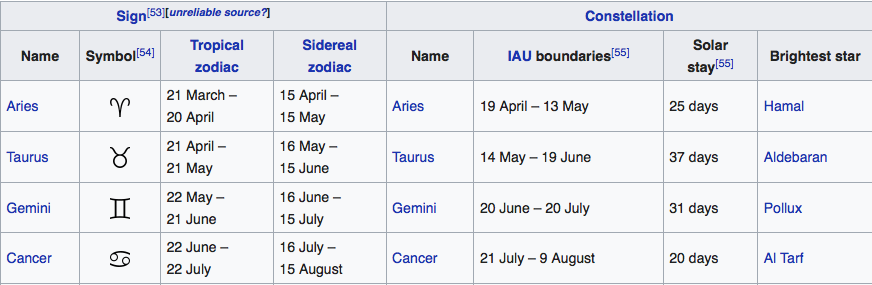

# WORKFLOW
## Database schema 
After creating the database design, we could see that we would be relating our datasets and the two tables through date. However, the raw data we worked with came with a variety of date formats. Most notably, our zodiac data did not have years, since the ranges repeat every year. We continued to design the database knowing that we would eventually make the dates compatable as we imported the data into MySQL.
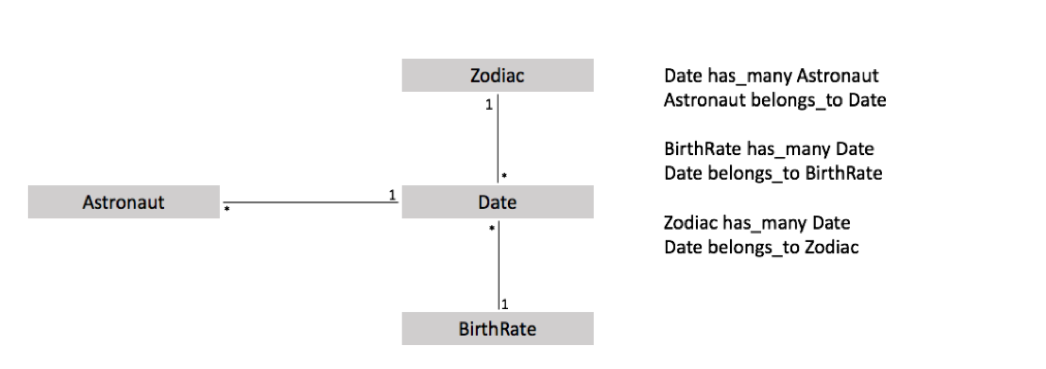
  
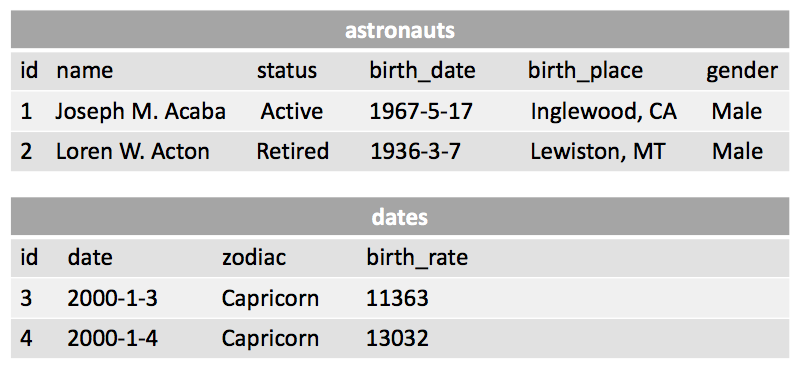  
  
## CSV files

Most of these data sets began as CSV files and did not need to be reformatted, except the astrological signs. This table could have been copied and pasted into Excel and cleaned up. However, since the table is small, we used this opportunity to practice manually creating CSV files in Python.  

In [1]:
import csv

# list of dicts for zodiac table 
zodiac = [
          {'id': 1, 'sign': 'Capricorn', 'start_date': '01-01', 'end_date': '01-20'},
          {'id': 2, 'sign': 'Aquarius', 'start_date': '01-21', 'end_date': '02-19'},
          {'id': 3, 'sign': 'Pisces', 'start_date': '02-20', 'end_date': '03-20'},
          {'id': 4, 'sign': 'Aries', 'start_date': '03-21', 'end_date': '04-20'}, 
          {'id': 5, 'sign': 'Taurus', 'start_date': '04-21', 'end_date': '05-21'},
          {'id': 6, 'sign': 'Gemini', 'start_date': '05-22', 'end_date': '06-21'},
          {'id': 7, 'sign': 'Cancer', 'start_date': '06-22', 'end_date': '07-22'},
          {'id': 8, 'sign': 'Leo', 'start_date': '07-23', 'end_date': '08-22'},
          {'id': 9, 'sign': 'Virgo', 'start_date': '08-23', 'end_date': '09-23'},
          {'id': 10, 'sign': 'Libra', 'start_date': '09-24', 'end_date': '10-23'},
          {'id': 11, 'sign': 'Scorpio', 'start_date': '10-24', 'end_date': '11-22'},
          {'id': 12, 'sign': 'Saggitarius', 'start_date': '11-23', 'end_date': '12-21'},
          {'id': 13, 'sign': 'Capricorn', 'start_date': '12-22', 'end_date': '12-31'}]
          

# list of keys that will become columns
column_names = ['id','sign','start_date','end_date']

with open('zodiacs.csv', 'w') as csvfile:

    myCsvWriter = csv.DictWriter(csvfile,
                                 delimiter=',',
                                 quotechar='"',
                                 fieldnames = column_names)

    myCsvWriter.writeheader() # uses contents of column_names

    #write: 
    #id,sign,start_date,end_date
    #1,Capricorn,01-01,01-20
    #2,Aquarius,01-21,02-19
    for row in zodiac:
        myCsvWriter.writerow(row)

#check what was written to the csv    
with open('zodiacs.csv', 'r') as csvfile:
     myCsvReader = csv.reader(csvfile, delimiter=',', quotechar='"')
     for row in myCsvReader:
        print(row)

['id', 'sign', 'start_date', 'end_date']
['1', 'Capricorn', '01-01', '01-20']
['2', 'Aquarius', '01-21', '02-19']
['3', 'Pisces', '02-20', '03-20']
['4', 'Aries', '03-21', '04-20']
['5', 'Taurus', '04-21', '05-21']
['6', 'Gemini', '05-22', '06-21']
['7', 'Cancer', '06-22', '07-22']
['8', 'Leo', '07-23', '08-22']
['9', 'Virgo', '08-23', '09-23']
['10', 'Libra', '09-24', '10-23']
['11', 'Scorpio', '10-24', '11-22']
['12', 'Saggitarius', '11-23', '12-21']
['13', 'Capricorn', '12-22', '12-31']


## MySQL database structure 
Once our tables were adjusted, we imported our CSV data into the MySQL tables: astronauts and dates. To do this, we:
1. created an empty database called astronauts_birthdays with the tables astronauts and dates:  
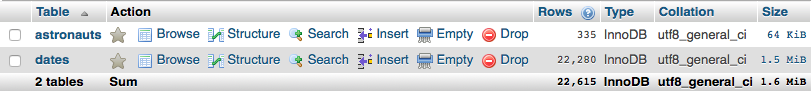
  
2. set the table structures based on the columns and data in our CSV files:  
***astronauts table*** 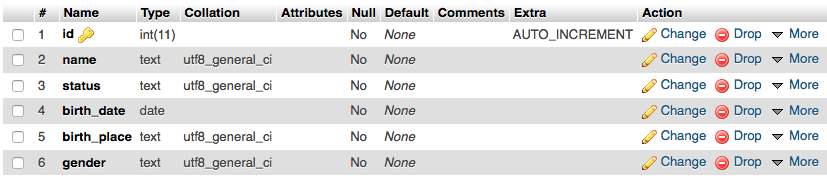
***dates table*** 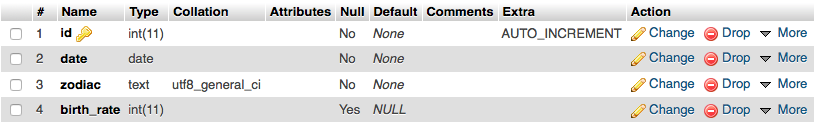
  
## CSV data import via Python  
  
  
### Create dates table
Our zodiac and birth rates data overlap on dates and had no additional columns that prevented joining the two data sets into one table: apart, both the zodiac and birth rates data would only have two columns each, an id and the zodiac name or birth count. To create one table out of these two datasets, we first needed to generate a table of all the days between 1920 (when our astronaut data starts) and 2020 (which includes all of our birth rate data). We could have joined the astronaut data as well, but keeping two separate tables made the data more accessible when it came time to query it.  

To generate the initial dates table, we had to create a daterange function that would 
define all dates in a range. We adapted this code from the example on this website to create the function: https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php

In [2]:
#insert all dates between 1920 and 1980 into the dates table
#make connections
import pymysql.cursors
from datetime import timedelta, date

#define the range of dates
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

#set start_date and end_date variables        
start_date = date(1920, 1, 1)
end_date = date(2020, 12, 31)

#open connection
connection = pymysql.connect(host="mariadb",
                             user="root",
                             passwd="",
                             db="astronauts_birthdays",autocommit=True,
                             cursorclass=pymysql.cursors.DictCursor)


#INSERT query for MySQL
sql = """INSERT INTO dates(date)
        VALUE (%(date)s)"""

#empty the database
cursor = connection.cursor()
cursor.execute("TRUNCATE dates")

with connection.cursor() as cursor:
    for single_date in daterange(start_date, end_date):
        param_dict = {"date": single_date}   
        cursor.execute(sql, param_dict)
        
print("done")

done


### Insert and edit zodiac data into dates
Once the dates table was created, we could then add zodiac signs to each date. However, the zodiac data only has a month and day, so we needed to iterate through the zodiac CSV rows for each year in our date range. To do this, we first tried to .split the month and day out from each start and end date as variables. However, when we put the results in to `datetime.date()`, they would only read as ints, not objects. To solve this problem, we imported parser from dateutil and used it to read an f-string of the year, month, and day variables. We later found out that we could achieve the same result using `datetime(year, int(month), int(day))` but we kept the parser solution because it reflects our own independent research. Even after this, we found that Capricorn, the first sign in our zodiac CSV was missing from each year. To make sure we included Capricorn, we wrote over our original CSV to split Capricorn into two rows, the first and last, so that the for loop began with `01-01` in our zodiac data to match the first row of our date table.

In [3]:
#make connections
import csv
import datetime
from datetime import datetime
from dateutil import parser

#UPDATE query to add zodiac to each date
sql = """UPDATE dates
    SET zodiac = %(sign)s
    WHERE date BETWEEN %(start_date)s AND %(end_date)s"""

with connection.cursor() as cursor:
    with open('zodiacs.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        for row in myCSVReader:
            for year in range(1920, 2020): #add all years in the table
                sign = row["sign"]
                
                #read the MM-DD as separate variables month and day
                month, day = row['start_date'].split("-") 
                #combine year, month, and date into one date variable
                start_date = datetime.date(parser.parse(f"{year}, {month}, {day}")) 
                
                #repeat process for end_date
                month, day = row['end_date'].split("-") 
                end_date = datetime.date(parser.parse(f"{year}, {month}, {day}"))
                
                param_dict = {"sign": sign, "start_date": start_date, "end_date": end_date}   
                cursor.execute(sql, param_dict)

print('done')

done


### Insert and edit birth rate data into dates  
Next we needed to add the birth rate data to its corresponding dates. We started with the 1994-2003 data set. Since these CSVs contain header text from its original html formatting, we had to skip the first 69 rows. We could have used **if** to skip all the rows without the right data format, but didn not need to since they only show up at the beginning of the document. Similar to the zodiac data, we had to use parser to generate a readable object for `datetime.date()`.  

In [4]:
#UPDATE query to add birth rate to each date
sql = """UPDATE dates
    SET birth_rate = %(births)s
    WHERE date = %(birth_date)s"""

with connection.cursor() as cursor:
    with open('birth_rates1994_2003.csv') as csvfile:
        #skip the rows of html comments and links
        for row in range(0,69):
            next(csvfile)
            
        myCSVReader = csv.DictReader(csvfile)
        for row in myCSVReader:
            births = row["births"]
            year = row["year"]
            month = row["month"]
            day = row["date_of_month"]
            #combine year, month, and date into one date variable
            birth_date = datetime.date(parser.parse(f"{year}, {month}, {day}")) 
            param_dict = {"births": births, "birth_date": birth_date}   
            cursor.execute(sql, param_dict)
            
print("done")

done


We repeated the process for the 2000-2014 CSV. This time, we needed to skip the rows for 2000-2003 since we already had this data from the previous set. At first, we tried to just extend the range of rows that we were skipping at the beginning of the file to include rows through 2003. However, this returned errors since those rows also included the row of column names. Instead, we used `if/else` to skip rows where the year was less than or equal to 2003.

In [5]:
#repeat above process for second birth rates file
sql = """UPDATE dates
    SET birth_rate = %(births)s
    WHERE date = %(birth_date)s"""

with connection.cursor() as cursor:
    with open('birth_rates2000_2014.csv') as csvfile:
       #skip the rows of html comments and links
        for row in range(0,69):
            next(csvfile)
            
        myCSVReader = csv.DictReader(csvfile)
        for row in myCSVReader:
            births = row["births"]
            year = row["year"]
            month = row["month"]
            day = row["date_of_month"]
            birth_date = datetime.date(parser.parse(f"{year}, {month}, {day}"))
            param_dict = {"births": births, "birth_date": birth_date}   
            
            #skip rows for years 2003 and earlier
            if int(year) <= 2003:
                skip = True
            else:
                cursor.execute(sql, param_dict)
                
print("done")

done


### Create astronauts table
Since our zodiacs and birth rates data reflect conditions in the U.S., we needed to eliminate NASA astronauts born outside the U.S. To do this, we used a dict of states and extracted the keys into a list. With `if` we checked each row in the asronauts CSV for the state keys and only wrote those rows that returned true to the astronauts table. We also dropped the unnecessary columns by excluding them from our SQL **INSERT** query and assigned new snake_case column names to the rows when creating the `param_dict`. Last, we reformatted the birthdays from the astronauts CSV into the standard `YYYY-MM-DD` format which automatically detected the `(%m/%d/%Y)` format in the CSV and transformed it into a datetime.

In [6]:
from datetime import datetime

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#get list of all keys from the dict 
#this is just to be safe: if/in is used later, which automatically looks for keys
state_list = list(states.keys())

sql = """INSERT INTO astronauts(name, status, birth_date, birth_place, gender)
        VALUE (%(name)s,%(status)s,%(birth_date)s,%(birth_place)s, %(gender)s)"""

#empty the database
cursor = connection.cursor()
cursor.execute("TRUNCATE astronauts")

with connection.cursor() as cursor:
    with open('astronauts.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        for row in myCSVReader:
            #check last two char in Birth Place rows for the state codes in state_list
            if row["Birth Place"][-2:] in state_list:
                #identify date structure in Birth Date and reformat to YYY-MM-DD
                birthdate = parser.parse(row["Birth Date"])
                param_dict = {"name": row["Name"],
                                "status": row["Status"],
                                "birth_date": birthdate,
                                "birth_place": row["Birth Place"],
                                "gender": row["Gender"]
                               }
                cursor.execute(sql, param_dict)

print("done")

done


# ANALYSIS & VISUALIZATION

## Querying MySQL via Python  
With the database constructed, we began running queries to answer the research questions on which our analysis is based. Since we really wanted to compare astronaut data to the total U.S. population, we ran several queries to return data for both.  

## Using Tableau
Based on our data, we decided to use Tableau for our visualization. We anticipated charts with two column variables, since our queries were comparative. For both analyses, we had two independent variables and one dependent variable. Tableau allowed us to easily arrange our variables into axes and select the chart/graph format that was best suited. One thing we expected to be able to do was arrange our zodiac data into a line graph, but since Tableau had no way of reading the zodiacs as chronological and we didn't include date ranges in our query, we were only able to output a circle view (scatterplot). This turned out to be sufficient to communicate our results. Rather than visualizing our two queries in the same format, we decided to explore Tableau a bit further by doing one bar chart and one scatterplot. Because of that, we were able to learn additional functions of Tableau.   
  
Although we learned about several ways to calculate things like average and standard deviation in Tableau, none seemed to work on the CSVs we exported. This may have been an issue because our data had two independent variables. Although we could have worked around that, we took the opportunity to try the calculations in Python.

## Query #1
### How does the distribution of astronaut birthdays across the week compare to that of the U.S. population?  
Our first questions test whether astronaut birthdays are generally distributed in similar ways to total birthdays. First, we queried to find how astronauts' birthdays are distributed across days of the week. Then, we queried to find the distribution of U.S. births generally. This query was straightforward to write, except when we ran it through pandas we noticed that the days of the week were out of order. We tried adding `ORDER BY DAYNAME(birth_date)`, but that outputs a string so the days were just in alphabetical order. Since `DAYOFWEEK()` returns the day as an int, we used this to correctly order the days.

In [7]:
#make connection for queries
import pymysql.cursors

connection = pymysql.connect(
            host="mariadb",
            user="root",  
            passwd="",  
            db="astronauts_birthdays",
            autocommit=True,
            cursorclass=pymysql.cursors.DictCursor
            )

In [8]:
sql = """
    SELECT DAYNAME(birth_date) AS day_of_week, COUNT(id) AS astronauts_born
    FROM astronauts
    GROUP BY `day_of_week`
    ORDER BY DAYOFWEEK(birth_date)
    """
    
with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'day_of_week': 'Sunday', 'astronauts_born': 52}
{'day_of_week': 'Monday', 'astronauts_born': 41}
{'day_of_week': 'Tuesday', 'astronauts_born': 45}
{'day_of_week': 'Wednesday', 'astronauts_born': 49}
{'day_of_week': 'Thursday', 'astronauts_born': 51}
{'day_of_week': 'Friday', 'astronauts_born': 50}
{'day_of_week': 'Saturday', 'astronauts_born': 47}


To compare these results to the U.S. population more generally, we ran a similar query on our birth rates data in the dates table. 

In [9]:
sql = """
    SELECT DAYNAME(date) AS day_of_week, SUM(birth_rate) AS births
    FROM dates
    GROUP BY `day_of_week`
    ORDER BY DAYOFWEEK(date)
    """
    
with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'day_of_week': 'Sunday', 'births': Decimal('8340922')}
{'day_of_week': 'Monday', 'births': Decimal('12672592')}
{'day_of_week': 'Tuesday', 'births': Decimal('14015353')}
{'day_of_week': 'Wednesday', 'births': Decimal('13775310')}
{'day_of_week': 'Thursday', 'births': Decimal('13691289')}
{'day_of_week': 'Friday', 'births': Decimal('13473095')}
{'day_of_week': 'Saturday', 'births': Decimal('9417666')}


By glancing at them, we can tell that these two sets differ but we can't tell by how much they differ. We could see this better as a double bar chart after combining the data into one table. A subquery wouldn't work because it shared no common attributes with the dates table: they only shared `DAYNAME(dates.date)`. Instead, we used **UNION**. Initially, the results returned in a weird order, so we needed an **ORDER BY**, but `ORDER BY DAYOFWEEK(dates.date)` returned an error message. `ORDER BY 1` didn't work because the `day_of_week` column is populated with strings. To solve this problem, we just needed to add `DAYOFWEEK(dates.date)` to each **SELECT** statement and order by its position, 1. These results were mostly in order, but to make them more consistent we had to then **ORDER BY** `variable_type`, resulting in `ORDER BY 1, 3`.

In [10]:
sql = """
    (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
        'astronaut_births' AS variable_type, COUNT(astronauts.id) as value
    FROM dates
    JOIN astronauts 
    ON dates.date = astronauts.birth_date
    GROUP BY `day_of_week`
    )
    UNION
    (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
        'birth_rate' AS variable_type, SUM(dates.birth_rate) as value
    FROM dates
    GROUP BY `day_of_week`
    )
    ORDER BY 1, 3
    """
    
with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'DAYOFWEEK(dates.date)': 1, 'day_of_week': 'Sunday', 'variable_type': 'astronaut_births', 'value': Decimal('52')}
{'DAYOFWEEK(dates.date)': 1, 'day_of_week': 'Sunday', 'variable_type': 'birth_rate', 'value': Decimal('8340922')}
{'DAYOFWEEK(dates.date)': 2, 'day_of_week': 'Monday', 'variable_type': 'astronaut_births', 'value': Decimal('41')}
{'DAYOFWEEK(dates.date)': 2, 'day_of_week': 'Monday', 'variable_type': 'birth_rate', 'value': Decimal('12672592')}
{'DAYOFWEEK(dates.date)': 3, 'day_of_week': 'Tuesday', 'variable_type': 'astronaut_births', 'value': Decimal('45')}
{'DAYOFWEEK(dates.date)': 3, 'day_of_week': 'Tuesday', 'variable_type': 'birth_rate', 'value': Decimal('14015353')}
{'DAYOFWEEK(dates.date)': 4, 'day_of_week': 'Wednesday', 'variable_type': 'astronaut_births', 'value': Decimal('49')}
{'DAYOFWEEK(dates.date)': 4, 'day_of_week': 'Wednesday', 'variable_type': 'birth_rate', 'value': Decimal('13775310')}
{'DAYOFWEEK(dates.date)': 5, 'day_of_week': 'Thursday', 'variable_type': 

The problem at this point, however, was that the total group size of U.S. births compared to astronaut births was very different. So we needed to query for the percent of the total of each group to make our comparison. To do this, we had to add subqueries to each **SELECT** statement that divided the number of births on a particular day of the week by the total number of births in that group. At first, we thought that the subqueries may have to include their own **GROUP BY**, but we found that the initial **GROUP BY** applies to the `COUNT` within the subqueries as well.

In [11]:
sql = """
    (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
        'astronaut_births' AS variable_type, 
        (COUNT(astronauts.id)/(SELECT COUNT(astronauts.id) 
                                FROM astronauts 
                                JOIN dates 
                                ON astronauts.birth_date = dates.date)) * 100 as percent
    FROM dates
    JOIN astronauts 
    ON dates.date = astronauts.birth_date
    GROUP BY `day_of_week`
    )
    UNION
    (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
        'birth_rate' AS variable_type, 
        (SUM(dates.birth_rate)/(SELECT SUM(dates.birth_rate) 
                                FROM dates))* 100 as percent
    FROM dates
    GROUP BY `day_of_week`
    )
    ORDER BY 1, 3
    """

with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'DAYOFWEEK(dates.date)': 1, 'day_of_week': 'Sunday', 'variable_type': 'astronaut_births', 'percent': Decimal('15.5224')}
{'DAYOFWEEK(dates.date)': 1, 'day_of_week': 'Sunday', 'variable_type': 'birth_rate', 'percent': Decimal('9.7685')}
{'DAYOFWEEK(dates.date)': 2, 'day_of_week': 'Monday', 'variable_type': 'astronaut_births', 'percent': Decimal('12.2388')}
{'DAYOFWEEK(dates.date)': 2, 'day_of_week': 'Monday', 'variable_type': 'birth_rate', 'percent': Decimal('14.8415')}
{'DAYOFWEEK(dates.date)': 3, 'day_of_week': 'Tuesday', 'variable_type': 'astronaut_births', 'percent': Decimal('13.4328')}
{'DAYOFWEEK(dates.date)': 3, 'day_of_week': 'Tuesday', 'variable_type': 'birth_rate', 'percent': Decimal('16.4141')}
{'DAYOFWEEK(dates.date)': 4, 'day_of_week': 'Wednesday', 'variable_type': 'astronaut_births', 'percent': Decimal('14.6269')}
{'DAYOFWEEK(dates.date)': 4, 'day_of_week': 'Wednesday', 'variable_type': 'birth_rate', 'percent': Decimal('16.1329')}
{'DAYOFWEEK(dates.date)': 5, 'day_of_week

In [12]:
#export results as CSV
import csv

with connection.cursor() as cursor:
    sql = """
        (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
            'astronaut_births' AS variable_type, 
            (COUNT(astronauts.id)/(SELECT COUNT(astronauts.id) 
                                    FROM astronauts 
                                    JOIN dates 
                                    ON astronauts.birth_date = dates.date))* 100 as percent
        FROM dates
        JOIN astronauts 
        ON dates.date = astronauts.birth_date
        GROUP BY `day_of_week`
        )
        UNION
        (SELECT DAYOFWEEK(dates.date), DAYNAME(dates.date) AS day_of_week, 
            'birth_rate' AS variable_type, 
            (SUM(dates.birth_rate)/(SELECT SUM(dates.birth_rate) FROM dates))* 100 as percent
        FROM dates
        GROUP BY `day_of_week`
        )
        ORDER BY 1, 3
        """
    cursor.execute(sql)
    results = cursor.fetchall()
    csv_column_order = list(results[0].keys())

    with open('birth_rates_by_weekday.csv', 'w', newline='') as csvfile:
        myCsvWriter = csv.DictWriter(csvfile, delimiter=',',
                                          quotechar='"',
                                          fieldnames = csv_column_order)

        myCsvWriter.writeheader()
        for row in results:
            myCsvWriter.writerow(row)
print("csv written")

csv written


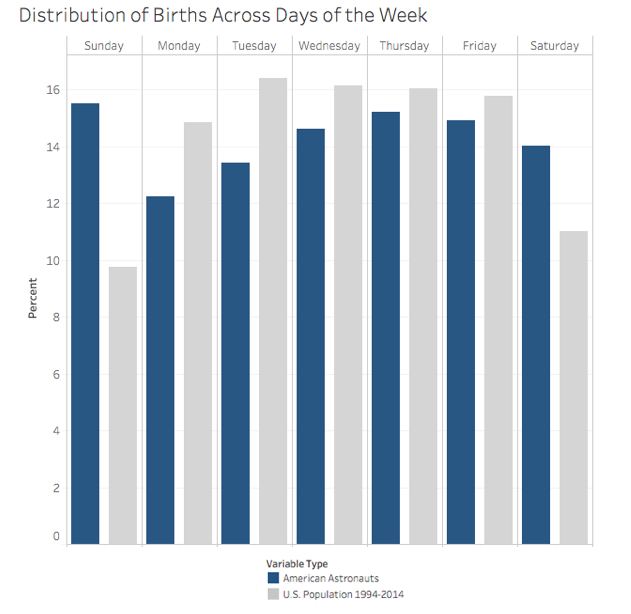  
If births have a uniform distribution across days of the week, we expect the percents to be about 14.2857%. Instead, we found that the U.S. population varied between weekdays and weekends, where (except for Monday) weekday births were around 16% of the population and weekend births were closer to 10%. There is a 6.65% range between the highest, Tuesday, and lowest, Sunday.  
  
Astronauts are more likely to be born on a Sunday than any other day, the opposite of the U.S. population, at a little over 15.5%. Astronaut births show greater range over the week, ranging from the lowest at about 12.25% on Mondays to about 15.22% on Thursdays. Interestingly, there is only a 3.28% difference between the highest, Sunday, and lowest, Monday, making astronaut births closer to a uniform distribution among days than the broader population.  
  
While the U.S. population data reflects births from 1994 to 2014, the astronauts were born between 1921 and 1978. This could account for the difference in distribution. It is possible that the practice of scheduling births and preference for c-sections has risen significantly between those time periods, which would explain why the national birth rates between 1994 and 2014 are so much lower on the weekend while this is not reflected among astronauts born before 1978.

To look at the results of this query another way, we wanted to play with the statistics capabilities of Python. To test our null hypothesis (that astronauts' birthdays occur at the same frequency as births in the U.S. population) we ran a chi square test with SciPy. First, we had to learn how to install modules into Python. Then we had to use our knowledge of lists and dicts to output our sql query results in a readable format for SciPy's chisquare function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html). The chi square results seem to support our idea that the difference between astronaut birth distribution and our U.S. population data has to do with a change in birth practices over time: the astronaut births in the context of uniform expected frequencies  has a p-value of about 0.932, suggesting extremely weak evidence against a null hypothesis--- that births can be expected to be uniformly distributed across the week. *However*, it's actually the U.S. births (as well as the astronaut births with the expected frequencies of the U.S. population) that demonstrate significant evidence to reject the null hypothesis. According to an article posted on Johns Hopkins University Press's website, scheduled and emergency c-sections have risen from 4.5% of all U.S. births in 1965 to 33% of births in 2009 (https://www.press.jhu.edu/news/blog/history-cesarean-section). 

In [13]:
#install scipy
import sys
!{sys.executable} -m pip install scipy

You are using pip version 19.0.2, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
#one-way chi square
import scipy
from scipy import stats
from scipy.stats import chisquare

with connection.cursor() as cursor:
    sql_astro = """
        SELECT COUNT(astronauts.id) as astro_by_day
        FROM astronauts
        JOIN dates 
        ON dates.date = astronauts.birth_date
        GROUP BY DAYOFWEEK(dates.date)
        """
    sql_us = """
        SELECT SUM(dates.birth_rate) as births_on_day
        FROM dates
        GROUP BY DAYOFWEEK(dates.date)
        """
    cursor.execute(sql_astro)
    results = cursor.fetchall()
    #create a list of values
    dict_astro = [row["astro_by_day"] for row in results]


    #repeat for U.S. population
    cursor.execute(sql_us)
    results = cursor.fetchall()
    dict_us_deci = [row["births_on_day"] for row in results]
    
    print(dict_astro)
    print(dict_us)
    
    print(chisquare(dict_astro))
    print(chisquare([8340922, 12672592, 14015353, 13775310, 13691289, 13473095, 9417666]))
    print(chisquare(dict_astro, f_exp=[8340922, 12672592, 14015353, 13775310, 13691289, 13473095, 9417666]))


[52, 41, 45, 49, 51, 50, 47]
[('8340922', '12672592', '14015353', '13775310', '13691289', '13473095', '9417666')]
Power_divergenceResult(statistic=1.8567164179104478, pvalue=0.9323932785580831)
Power_divergenceResult(statistic=2662642.8203225797, pvalue=0.0)
Power_divergenceResult(statistic=85385557.0013857, pvalue=0.0)


## Query #2
### How does the distribution of astronaut birthdays among zodiac signs compare to that of the U.S. population?

Then, we wanted to find out whether astronauts are more likely to be born under certain zodiac signs or not. One thing we realized while trying to write this query is that without **ORDER BY** the results are not ordered in the order that they occur. To correct for this, we added an **ORDER BY** to put the results in chronological order by month and day.

In [15]:
#make connection for queries
import pymysql.cursors

connection = pymysql.connect(
            host="mariadb",
            user="root",  
            passwd="",  
            db="astronauts_birthdays",
            autocommit=True,
            cursorclass=pymysql.cursors.DictCursor
            )

In [16]:
sql = """
    SELECT COUNT(astronauts.id) AS astronaut_count, dates.zodiac FROM astronauts 
    JOIN dates 
    ON astronauts.birth_date = dates.date 
    GROUP BY dates.zodiac
    ORDER BY MONTH(dates.date), DAY(dates.date)
    """

with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'astronaut_count': 20, 'zodiac': 'Capricorn'}
{'astronaut_count': 26, 'zodiac': 'Aquarius'}
{'astronaut_count': 29, 'zodiac': 'Pisces'}
{'astronaut_count': 22, 'zodiac': 'Aries'}
{'astronaut_count': 34, 'zodiac': 'Taurus'}
{'astronaut_count': 21, 'zodiac': 'Gemini'}
{'astronaut_count': 27, 'zodiac': 'Cancer'}
{'astronaut_count': 34, 'zodiac': 'Leo'}
{'astronaut_count': 42, 'zodiac': 'Virgo'}
{'astronaut_count': 29, 'zodiac': 'Libra'}
{'astronaut_count': 37, 'zodiac': 'Scorpio'}
{'astronaut_count': 14, 'zodiac': 'Saggitarius'}


This shows us the totals for each sign, but since we wanted to compare them to the rates in the U.S. population, we needed to find the percent of the total number of astronauts.

In [17]:
sql = """
    SELECT dates.zodiac, COUNT(astronauts.id) AS astronaut_count, 
        (COUNT(astronauts.id) / (SELECT COUNT(astronauts.id) 
                                FROM astronauts 
                                JOIN dates 
                                ON dates.date = astronauts.birth_date)) * 100 AS percent 
    FROM astronauts
    JOIN dates 
    ON astronauts.birth_date = dates.date 
    GROUP BY dates.zodiac
    ORDER BY MONTH(dates.date), DAY(dates.date)
    """

with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'zodiac': 'Capricorn', 'astronaut_count': 20, 'percent': Decimal('5.9701')}
{'zodiac': 'Aquarius', 'astronaut_count': 26, 'percent': Decimal('7.7612')}
{'zodiac': 'Pisces', 'astronaut_count': 29, 'percent': Decimal('8.6567')}
{'zodiac': 'Aries', 'astronaut_count': 22, 'percent': Decimal('6.5672')}
{'zodiac': 'Taurus', 'astronaut_count': 34, 'percent': Decimal('10.1493')}
{'zodiac': 'Gemini', 'astronaut_count': 21, 'percent': Decimal('6.2687')}
{'zodiac': 'Cancer', 'astronaut_count': 27, 'percent': Decimal('8.0597')}
{'zodiac': 'Leo', 'astronaut_count': 34, 'percent': Decimal('10.1493')}
{'zodiac': 'Virgo', 'astronaut_count': 42, 'percent': Decimal('12.5373')}
{'zodiac': 'Libra', 'astronaut_count': 29, 'percent': Decimal('8.6567')}
{'zodiac': 'Scorpio', 'astronaut_count': 37, 'percent': Decimal('11.0448')}
{'zodiac': 'Saggitarius', 'astronaut_count': 14, 'percent': Decimal('4.1791')}


Once we had those results, we wanted to know: How do astronauts' zodiac signs compare to the rest of the U.S. population? To get there, we queried the dates table for the total number of births under each zodiac sign between 1994 and 2014 as well as the percent of the population born under each sign. If births have a uniform distribution across the year, we can expect percentages around 8.333...%.

In [18]:
sql = """
    SELECT dates.zodiac AS zodiac, SUM(dates.birth_rate) AS total, 
        (SUM(dates.birth_rate) / (SELECT SUM(dates.birth_rate) 
                                  FROM dates 
                                  WHERE dates.birth_rate IS NOT NULL)) * 100 AS percent
    FROM dates 
    WHERE dates.birth_rate IS NOT NULL
    GROUP BY dates.zodiac
    ORDER BY MONTH(dates.date), DAY(dates.date)
    """

with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'zodiac': 'Capricorn', 'total': Decimal('6628065'), 'percent': Decimal('7.7625')}
{'zodiac': 'Aquarius', 'total': Decimal('6867921'), 'percent': Decimal('8.0434')}
{'zodiac': 'Pisces', 'total': Decimal('6722139'), 'percent': Decimal('7.8726')}
{'zodiac': 'Aries', 'total': Decimal('7073889'), 'percent': Decimal('8.2846')}
{'zodiac': 'Taurus', 'total': Decimal('7127726'), 'percent': Decimal('8.3476')}
{'zodiac': 'Gemini', 'total': Decimal('7240265'), 'percent': Decimal('8.4794')}
{'zodiac': 'Cancer', 'total': Decimal('7461767'), 'percent': Decimal('8.7388')}
{'zodiac': 'Leo', 'total': Decimal('7579380'), 'percent': Decimal('8.8766')}
{'zodiac': 'Virgo', 'total': Decimal('7892084'), 'percent': Decimal('9.2428')}
{'zodiac': 'Libra', 'total': Decimal('7158138'), 'percent': Decimal('8.3832')}
{'zodiac': 'Scorpio', 'total': Decimal('6980754'), 'percent': Decimal('8.1755')}
{'zodiac': 'Saggitarius', 'total': Decimal('6654099'), 'percent': Decimal('7.7929')}


In the same way we handled the `day_of_week` query, we used **UNION** to join the two queries, added a variable column and set the variable to identify the original data set, and ordered by the corresponding zodiac sign.

In [19]:
sql = """
    (SELECT dates.zodiac AS zodiac, SUM(dates.birth_rate) AS total, 'total_births' AS variable_type, 
        (SUM(dates.birth_rate) / (SELECT SUM(dates.birth_rate) 
                                  FROM dates 
                                  WHERE dates.birth_rate IS NOT NULL)) * 100 AS percent 
    FROM dates 
    WHERE dates.birth_rate IS NOT NULL
    GROUP BY dates.zodiac
    ORDER BY MONTH(dates.date), DAY(dates.date)
    )
    UNION
    (SELECT dates.zodiac, COUNT(astronauts.id) AS astronaut_count, 'astronaut_births' AS variable_type,
        (COUNT(astronauts.id) / (SELECT COUNT(astronauts.id) 
                                 FROM astronauts 
                                 JOIN dates 
                                 ON dates.date = astronauts.birth_date)) * 100 AS percent
    FROM astronauts
    JOIN dates 
    ON astronauts.birth_date = dates.date 
    GROUP BY dates.zodiac
    ORDER BY MONTH(dates.date), DAY(dates.date)
    )
    """

with connection.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for result in results:
        print (result)

{'zodiac': 'Aquarius', 'total': Decimal('6867921'), 'variable_type': 'total_births', 'percent': Decimal('8.0434')}
{'zodiac': 'Aries', 'total': Decimal('7073889'), 'variable_type': 'total_births', 'percent': Decimal('8.2846')}
{'zodiac': 'Cancer', 'total': Decimal('7461767'), 'variable_type': 'total_births', 'percent': Decimal('8.7388')}
{'zodiac': 'Capricorn', 'total': Decimal('6628065'), 'variable_type': 'total_births', 'percent': Decimal('7.7625')}
{'zodiac': 'Gemini', 'total': Decimal('7240265'), 'variable_type': 'total_births', 'percent': Decimal('8.4794')}
{'zodiac': 'Leo', 'total': Decimal('7579380'), 'variable_type': 'total_births', 'percent': Decimal('8.8766')}
{'zodiac': 'Libra', 'total': Decimal('7158138'), 'variable_type': 'total_births', 'percent': Decimal('8.3832')}
{'zodiac': 'Pisces', 'total': Decimal('6722139'), 'variable_type': 'total_births', 'percent': Decimal('7.8726')}
{'zodiac': 'Saggitarius', 'total': Decimal('6654099'), 'variable_type': 'total_births', 'percent

In [20]:
import csv

with connection.cursor() as cursor:
    sql = """
        (SELECT dates.zodiac AS zodiac, SUM(dates.birth_rate) AS total, 'total_births' AS variable_type, 
            (SUM(dates.birth_rate) / (SELECT SUM(dates.birth_rate) 
                                      FROM dates 
                                      WHERE dates.birth_rate IS NOT NULL)) * 100 AS percent  
        FROM dates 
        WHERE dates.birth_rate IS NOT NULL
        GROUP BY dates.zodiac
        ORDER BY MONTH(dates.date), DAY(dates.date)
        )
        UNION
        (SELECT dates.zodiac, COUNT(astronauts.id) AS astronaut_count, 'astronaut_births' AS variable_type, 
            (COUNT(astronauts.id) / (SELECT COUNT(astronauts.id) 
                                     FROM astronauts 
                                     JOIN dates 
                                     ON dates.date = astronauts.birth_date)) * 100 AS percent 
        FROM astronauts
        JOIN dates 
        ON astronauts.birth_date = dates.date 
        GROUP BY dates.zodiac
        ORDER BY MONTH(dates.date), DAY(dates.date)
        )
        ORDER BY FIELD(`zodiac`,'Capricorn','Aquarius','Pisces','Aries','Taurus','Gemini','Cancer','Leo','Virgo','Libra','Scorpio','Saggitarius')
        """
    cursor.execute(sql)
    results = cursor.fetchall()
    csv_column_order = list(results[0].keys())

    with open('zodiac_birth_rates.csv', 'w', newline='') as csvfile:
        myCsvWriter = csv.DictWriter(csvfile, delimiter=',',
                                          quotechar='"',
                                          fieldnames = csv_column_order)

        myCsvWriter.writeheader()
        for row in results:
            myCsvWriter.writerow(row)
print("csv written")

csv written


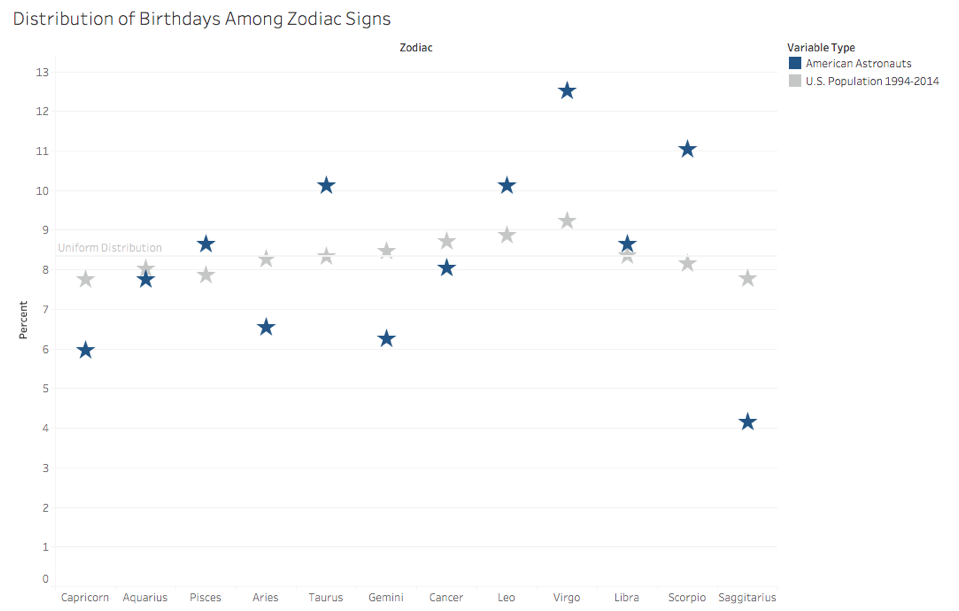  
Again we expected a uniform distribution at 8.333...% among the zodiac signs. The largest share of U.s. birthdays belonged to Virgo (at 9.24%), at least between 1994 and 2014. The lowest belonged to Capricorn (at 7.76%). The rest stuck pretty close to the expected uniform distribution, with a range of 1.48%.  
  
Astronaut birthdays, on the other hand, were a different story. Virgos were also the highest among astronauts, but at an astounding 12.54%. Saggitarius was the lowest, at a dismal 4.18%, making the range 8.36%.

# REFLECTION

**The skills we learned in class** that allowed us to wrangle and analyze this data include:  
1.  writing CSV files from dicts and MySQL queries,
2.  inserting and updating MySQL tables with data from CSV files,
3.  reformatting dates from one or several columns to standard YYYY-MM-DD format using variables and .split,  
4.  using if/else to skip certain rows while writing data to MySQL tables, and
5.  running MySQL queries and writing them to CSVs.

**The skills we learned on our own** that allowed us to solve particular problems we ran into include:  
1.  generating a table of consecutive dates using daterange and timedelta,
2.  parsing f-strings to create readable objects for datetime functions,
3.  joining two SELECT statements with the same columns with UNION,  
4.  calculating percentages with SELECT statement subqueries,
5.  visualizing our data with Tableau, and
6.  running statistical calculation with the Python statistics modual.

**We are particularly proud** of how we inserted zodiac names into our date table. Other tasks, such as our UNION queries, challenge us to learn new ways to code either in either mysql or Python. This task required us teach ourselves new skills in both languages. For MySQL, this was the first query where we learned how to update a series of values over a range. In Python, we had to create nested loops that updated 100 years of dates using a csv that only had data for one year. We also had to learn how to use the parser tool and f-string to convert the strange month-date format of the original csv into a datetime object.

**To conduct our analysis** we learned about Tableau. Neither of us had any experience with Tableau, so we started by watching the introductory video from Tableau Software: https://www.tableau.com/learn/training. This taught us how to import CSV datasets and begin arranging the variables in a worksheet. We played with the arrangement of our variables in the worksheet to identify the other Tableau skills we'd need to create our charts. We had to Google how to do things like: 
* change the layout of the chart by changing the order of the variables
* rename the certain variables with aliases
* format the colors, shapes, and labels in the chart
* insert an average line or range across the chart and add a legend
We found the most useful answers from https://www.dataplusscience.com and https://playfairdata.com/.  

While reading articles and watching videos, we learned ways to edit and query the data to accomplish the same things we did with our data in Python and MySQL like splits, joins, and renaming columns. One thing that was particularly useful to learn was rearranging the order of independent variables. While we learned how to sort ascending and descending in the Tableau training video, we went to Tableau's online help blog, https://onlinehelp.tableau.com/, to learn to manually arrange the order of independent variables.  

We tried to learn how to calculate standard deviation and variance in Tableau but could not get it to work on our data without importing the astronaut data and U.S. population data as separate CSV files. Instead, we took the opportunity to learn another Python module, statistics. The biggest barrier we faced to this was learning how to point to a value in a dict within a list of dicts. 

# CONCLUSION  
  
The purpose of this project was to explore methods to compare and clean up diverse datasets using a broad range of tools, particularly Python, MySQL, and relational databases in phpMyAdmin. Our exploration offered the opportunity to problem solve with these tools and ulitmately revealed interesting peculiarities about astronaut birthdays, both on their own and in comparison the general population. It was particularly interesting to see how the day of the week of birth varied greatly between the two populations. We did not expect our analysis to show this kind of change, which may indicate something about the practice of scheduling births and preference for c-sections in recent years. It was also intriguing to discover that there really are certain star signs that seem to be correlated with propensity to become an astronaut. While a more statistics-focused study would be necessary to make any hard claims about this data, we gained valuable knowledge about data wrangling methods through our work. 